<a href="https://colab.research.google.com/github/bdts1547/CS112.L21.KHTN_N11/blob/main/19521316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [4]:
% cd /gdrive/MyDrive/CS231.L21.KHTN/Sosanh2Anh

/gdrive/.shortcut-targets-by-id/1MWsP46zhQECxf8XeFXQ8LYF1YSHf6E_W/CS231.L21.KHTN/Sosanh2Anh


In [ ]:
%ls

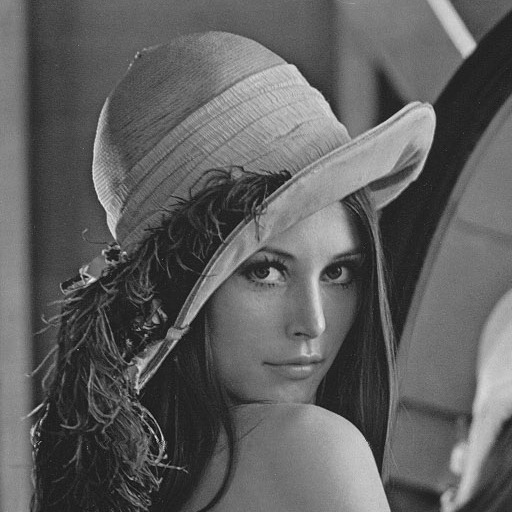

262144


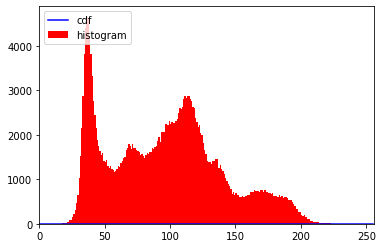

In [8]:

img = cv.imread('lena.jpg',0)
cv2_imshow(img)
size = img.shape[0]*img.shape[1]
print(size)
hist,bins = np.histogram(img.flatten(),256,[0,256])
hist = hist/size
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256,],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


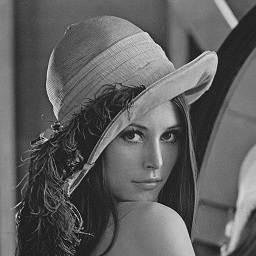

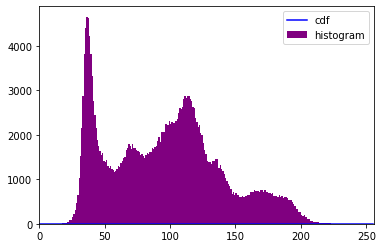

In [9]:

img2 = cv.imread('lena256.jpg',0)
size2 = img2.shape[0]*img2.shape[1]
cv2_imshow(img2)
hist2, bins = np.histogram(img.flatten(),256,[0,256])
hist2 = hist2 / size
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256,],color = 'purple')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper right')
plt.show()


In [59]:
def Compute_Histogram(path):
  img = cv.imread(path,0)
  hist,bins = np.histogram(img.flatten(),256,[0,256])
  size = (img.shape[0]*img.shape[1])
  hist = hist / size
  return hist,img

In [60]:

path = '/gdrive/MyDrive/CS231.L21.KHTN/Sosanh2Anh/DogCatSimple/train'
list_img = os.listdir(path)
list_hist= []
list_show= []
for img in list_img:
  hist,image = Compute_Histogram(os.path.join(path,img))
  list_show.append(image)
  list_hist.append(hist)


In [61]:
new_query = '/gdrive/MyDrive/CS231.L21.KHTN/Sosanh2Anh/DogCatSimple/test/1.jpg'
img_test = cv.imread(new_query,0)
hist_test,bins = np.histogram(img_test.flatten(),256,[0,256])
hist_test = hist_test / (img_test.shape[0]*img_test.shape[1])


In [ ]:
list_dist = []
for l in list_hist:
  list_dist.append(sum((l - hist_test)**2))
print(list_dist)

In [65]:
index = np.argsort(list_dist)
top5 = index[0:5]
print(top5) # top 5

[31 23 19  5  4]


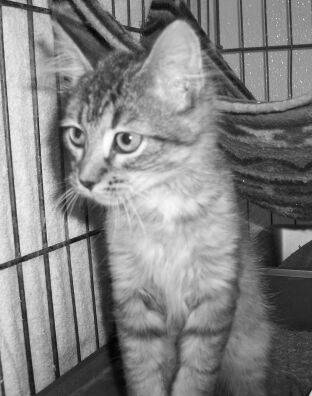

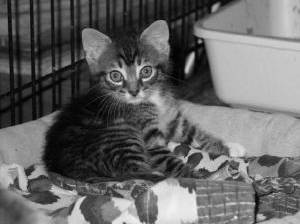

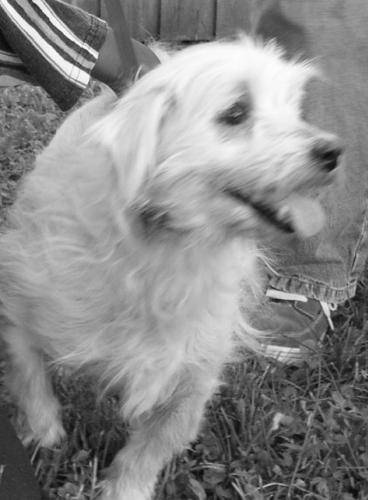

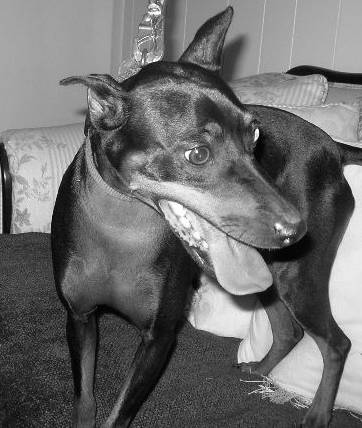

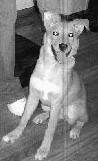

In [67]:
for i in top5:
  cv2_imshow(list_show[i])